In [2]:
import os
# import cv2
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [14.00, 10.00]
# plt.rcParams["figure.autolayout"] = True

In [3]:
def find_valid_files(root_path):
    filenames = []
    for root, dirs, files in os.walk(root_path):
        for file in files:
            filename = os.path.join(root, file)
            if '.ipynb' not in filename:
                filenames.append(os.path.basename(filename))
    return filenames

In [6]:
condtions = ['original_images', 'gradcam_emotions', 'landmarks_strokes', 'textures', 'final_textures', 'final_textures_with_outlines']
emotion_lut = {'T1':'Happy', 'T2':'Sad', 'T3':'Surprise', 'T4':'Embarrased', 'T5':'Fear', 'T6':'Painful', 'T7':'Angry', 'T8':'Disgust',}

prefix = './'
images_list = find_valid_files(prefix + condtions[0])
images_list.sort()
# random.shuffle(images_list)
# print(images_list[0])

df = pd.DataFrame(images_list, columns=['file'])
df.to_csv('face_list.csv', index=False)

F014 Painful
M004 Happy
M001 Surprise
M009 Disgust
F004 Surprise


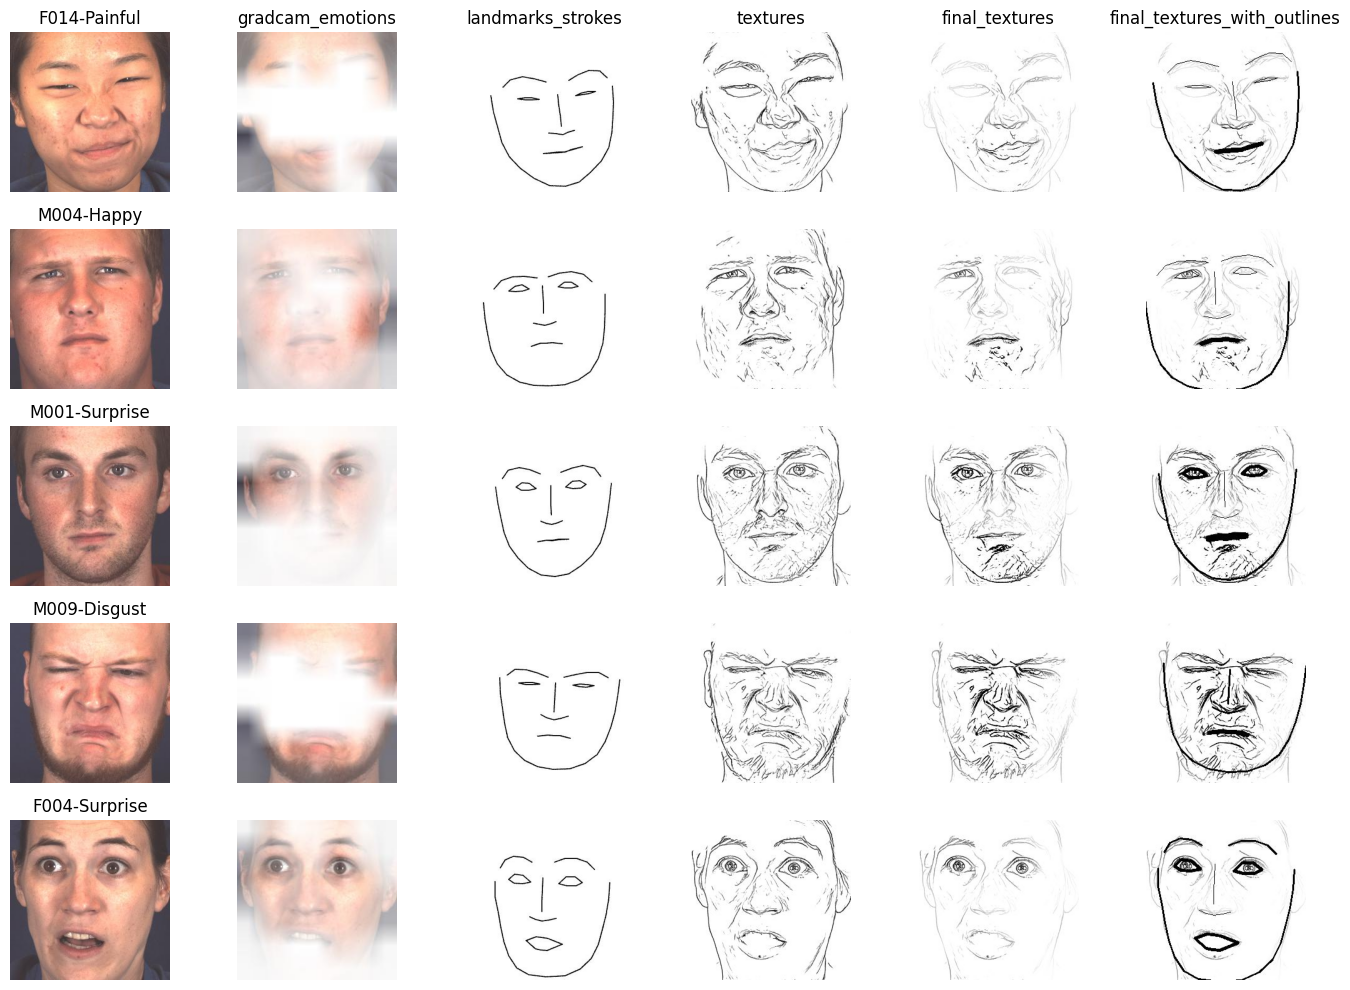

In [57]:
# number of images to sample
n_rows = 5 
# number of vis. conditions
n_cols = len(condtions) 
# where to start in sampling
start = 0 

for j in range(n_cols):
    # Add column title
    plt.subplot(n_rows, n_cols, j + 1)
    plt.title(condtions[j])
    plt.axis('off')
    # Plot images for each row in the current column
    for i in range(n_rows):
        plt.subplot(n_rows, n_cols, i*(n_cols)+j+1)
        data = cv2.imread(os.path.join(prefix, condtions[j], images_list[i]), cv2.IMREAD_UNCHANGED)
        data = cv2.cvtColor(data, cv2.COLOR_BGR2RGBA)
        # print(data.shape)
        plt.imshow(data)
        plt.axis('off')

# Add row titles
for i in range(n_rows):    
    plt.subplot(n_rows, n_cols, i * n_cols+1)    
    actor = images_list[i].split('_')[0]
    emotion = emotion_lut[images_list[i].split('_')[1]]
    title = actor + '-' + emotion
    print(actor, emotion)
    plt.title(title, loc='center')
    
plt.show()